In [1]:
import pandas as pd
import glob
import scipy 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df_usuario = pd.read_csv("usuarios_completo.csv")

In [33]:
ls paperspace

10k_frecuencias_corpus.csv         my_model_checkpoints_ellas/
10k_mas_comunes.csv                my_model_checkpoints_ellas_albeto/
BETO twitter - fallo.ipynb         my_model_checkpoints_ellos/
Entrenando BETO.ipynb              my_model_checkpoints_ellos_albeto/
Entrenando albeto.ipynb            results_thesis/
Untitled.ipynb                     traducciones_comunes.csv
encoding_words.ipynb               traducciones_comunes2.csv
gobernadoras_small.csv             traducciones_stopwords2.csv
gobernadores_small.csv             tweets_hombres.csv
ideas mias/                        tweets_mujeres.csv


In [71]:
df_dip = pd.read_csv("dip.csv")
df_premun = pd.read_csv("premun.csv")
df_sec = pd.read_csv("secr.csv")
df_sen = pd.read_csv("sena.csv")
df_gob = pd.read_csv("gobernadorxs.csv")

In [72]:
len(df_dip.columns),len(df_premun.columns),len(df_sec.columns),len(df_sen.columns),len(df_gob.columns)

(12, 12, 12, 11, 11)

In [73]:
df_politicxs = pd.concat([df_dip.drop("Comentarios",axis=1), df_premun.drop("Comentarios",axis=1),
                          df_sec,df_sen,df_gob])

In [74]:
len(df_dip),len(df_sen), len(df_sec), len(df_gob), len(df_premun)

(204, 140, 17, 32, 39)

Tenemos a Mauricio Kuri y a Rubén Rocha en dos ocasiones. Tomar en cuenta que no son 432, sino 430

In [75]:
df_politicxs[df_politicxs["Nombre"].duplicated()]

,Nombre,Puesto,Usuario,Ubicación,Fecha de inicio,Fecha de término,Seguidores,Tweets hechos,Tweets respuesta,Componente SG,Edad,Unnamed: 11,Ubicación
22,Mauricio Kuri González,Gobernador,@makugo,NaN,21-10-1,30-9-27,NaN,NaN,NaN,H,53.0,NaN,Querétaro
25,Rubén Rocha Moya,Gobernador,@rochamoya_\n,NaN,21-11-1,31-10-27,NaN,NaN,NaN,H,73.0,NaN,Sinaloa


In [77]:
n = len(df_politicxs) - 2

In [81]:
df_a = df_politicxs[df_politicxs["Componente SG"] == "M"]
df_o = df_politicxs[df_politicxs["Componente SG"] == "H"]

In [90]:
len(df_a),len(df_o)-2, len(df_politicxs)

(195, 235, 432)

In [88]:
len(df_a)/(len(df_politicxs)-2)

0.4513888888888889

In [89]:
(len(df_o)-2)/(len(df_politicxs)-2)

0.5465116279069767

In [119]:
df_sin_usuario = df_politicxs[df_politicxs['Usuario'].isna()==True]
df_sin_usuario_m = df_sin_usuario[df_sin_usuario["Componente SG"]=="M"]
df_sin_usuario_h = df_sin_usuario[df_sin_usuario["Componente SG"]=="H"]

In [120]:
len(df_sin_usuario),len(df_sin_usuario_m),len(df_sin_usuario_h)

(37, 16, 21)

Acerca de lxs que sí tienen usuario de Twitter.

In [121]:
usuarixs= df_politicxs[df_politicxs['Usuario'].isna()==False]
usuarias = usuarixs[usuarixs["Componente SG"]=="M"]
usuarios = usuarixs[usuarixs["Componente SG"]=="H"]

In [133]:
edad_ellas = usuarias[usuarias["Edad"].isna()==False]
edad_ellas = list(edad_ellas.Edad)

In [144]:
edad_ellos = usuarios[usuarios["Edad"].isna()==False]
edad_ellos = list(edad_ellos.Edad)

In [145]:
sum(edad_ellas)/len(edad_ellas)

48.86470588235294

In [146]:
sum(edad_ellos)/len(edad_ellos)

53.5

<AxesSubplot:>

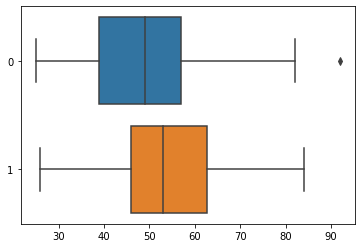

In [149]:
sns.boxplot(data= [edad_ellas, edad_ellos], orient='h')

In [153]:
merged = usuarixs.set_index('Ubicación').join(usuarixs.set_index('Ubicación'))
merged.head()

ValueError: columns overlap but no suffix specified: Index(['Nombre', 'Puesto', 'Usuario', 'Ubicación ', 'Fecha de inicio',
       'Fecha de término', 'Seguidores', 'Tweets hechos', 'Tweets respuesta',
       'Componente SG', 'Edad', 'Unnamed: 11'],
      dtype='object')

In [151]:
usuarixs.columns

Index(['Nombre', 'Puesto', 'Usuario', 'Ubicación ', 'Fecha de inicio',
       'Fecha de término', 'Seguidores', 'Tweets hechos', 'Tweets respuesta',
       'Componente SG', 'Edad', 'Unnamed: 11', 'Ubicación'],
      dtype='object')

In [3]:
len(pd.read_csv("tweets_hombres.csv"))

201038